In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline#for encoding
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('data-ques-3\dataset.csv')
df.head()

,size,weight,skincolor,target
0,35,0.571539,139,0
1,23,5.348117,184,0
2,38,3.419377,126,0
3,34,3.323665,137,0
4,34,1.453573,198,0


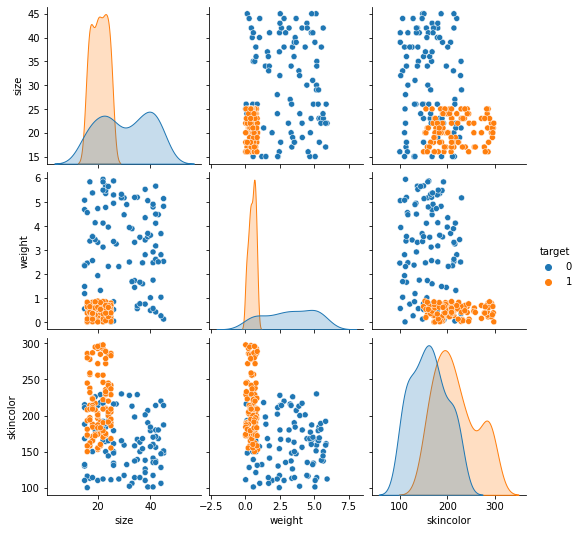

In [3]:
sns.pairplot(data=df, hue = 'target')

<AxesSubplot:>

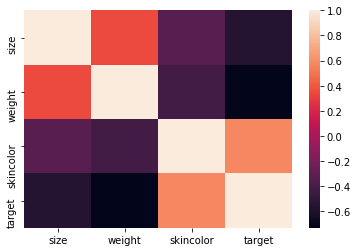

In [4]:
# correlation matrix
sns.heatmap(df.corr())

In [5]:
target = df['target']
df1 = df.copy()
df1 = df1.drop('target', axis =1)

In [6]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df1 , target, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (160, 3)
Testing split input-  (40, 3)


In [7]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [8]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.86      0.95      0.90        19

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



[[18  3]
 [ 1 18]]


Text(0.5, 1.0, 'Accuracy Score: 0.9')

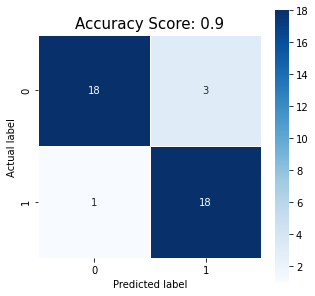

In [9]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

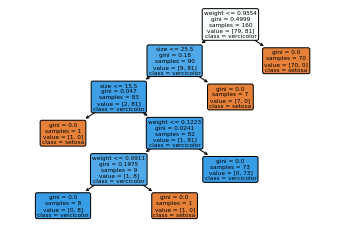

In [10]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)